<a href="https://colab.research.google.com/github/amiryarahmadi/NGC6946/blob/main/NGC6946.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install aplpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.1/978.1 kB 34.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.2/210.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 60.4 MB/s eta 0:00:00
  Created wheel for pyregion: filename=pyregion-2.2.0-cp310-cp310-linux_x86_64.whl size=433521 sha256=e599f91129889100cd04053a51e043f8a5ddc513203b2cad8b92effdf3c8f0dd
  Stored in directory: /root/.cache/pip/wheels/d9/70/ba/133c9854fc976d08620a301e977d089103a5bf96cc5

In [ ]:

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
from aplpy import FITSFigure
import warnings
from scipy.ndimage import zoom
from scipy.interpolate import interpn
warnings.simplefilter('ignore')
%matplotlib inline



ImportError: cannot import name 'update_default_config' from 'astropy.config.configuration' (/usr/local/lib/python3.10/dist-packages/astropy/config/configuration.py)

In [ ]:

SFR = '/content/drive/MyDrive/HAWC_RADIO/sfr_gm.fits'

NH = '/content/drive/MyDrive/HAWC_RADIO/NH_gm.ftis'

I_radio = '/content/drive/MyDrive/HAWC_RADIO/n6946cm6i.merg.15.fits'

Q_radio = '/content/drive/MyDrive/HAWC_RADIO/n6946cm6q.merg.15.fits'

U_radio = '/content/drive/MyDrive/HAWC_RADIO/n6946cm6u.merg.15.fits'

polc = '/content/drive/MyDrive/HAWC_RADIO/polc.fits'




In [ ]:
I = fits.open(I_radio)


I_data = I[0].data

I[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    4 /                                                
NAXIS1  =                  331 /                                                
NAXIS2  =                  331 /                                                
NAXIS3  =                    1 /                                                
NAXIS4  =                    1 /                                                
EXTEND  =                    T /                                                
BLOCKED =                    T /                                                
OBJECT  =  'NGC6946 '                                                           
TELESCOP=  'EFFELSBERG'                                                         
INSTRUME=  '?       '                                                           
OBSERVER=  '?       '       

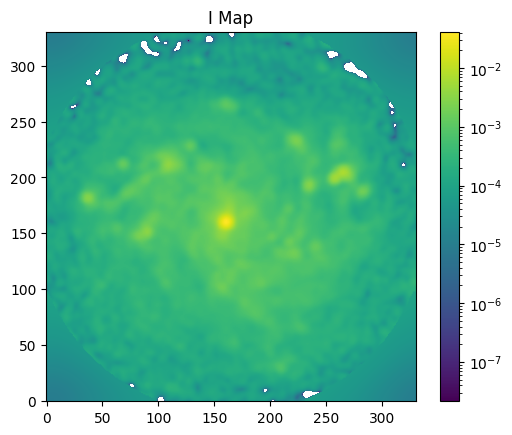

In [ ]:
plt.imshow(I_data.squeeze(),origin='lower',norm=LogNorm())
plt.title('I Map')
plt.colorbar()
plt.show()

In [ ]:
Q = fits.open(Q_radio)

Q_data = Q[0].data

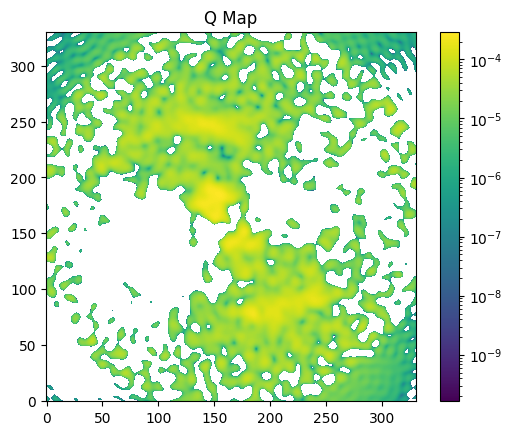

In [ ]:
plt.imshow(Q_data.squeeze(),origin='lower',norm=LogNorm())
plt.title('Q Map')
plt.colorbar()
plt.show()

In [ ]:
U = fits.open(U_radio)

U_data = U[0].data

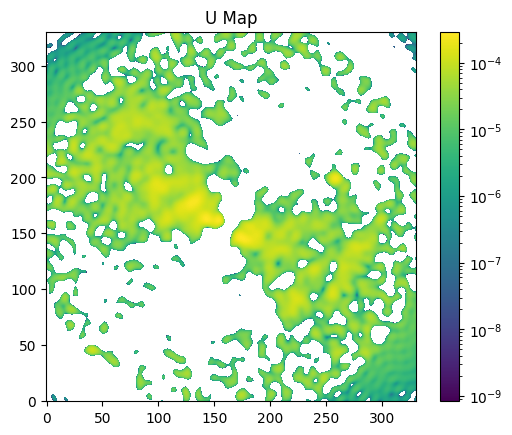

In [ ]:
plt.imshow(U_data.squeeze(),origin='lower',norm=LogNorm())
plt.title('U Map')
plt.colorbar()
plt.show()


In [ ]:
sfr = fits.open(SFR)

sfr_data = sfr[0].data

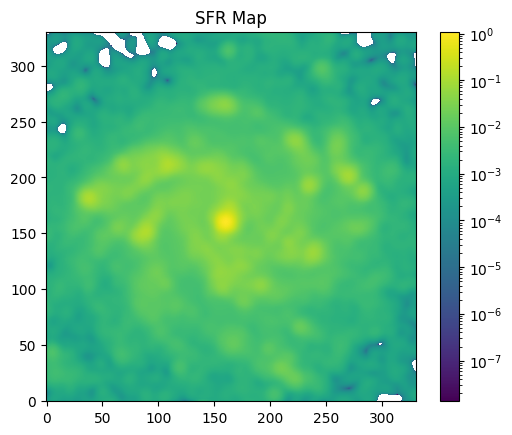

In [ ]:
plt.imshow(sfr_data.squeeze(),origin='lower',norm=LogNorm())
plt.title('SFR Map')
plt.colorbar()
plt.show()

#NHI

In [ ]:
NH = fits.open(NH)

NH_data = NH[0].data

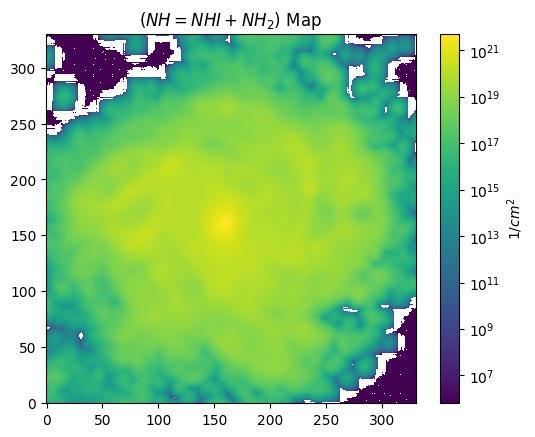

In [ ]:
plt.figure()
plt.imshow(NH_data,origin='lower',norm = LogNorm())
plt.title('($NH = NHI + NH_2$) Map')
plt.colorbar(label = '$1/cm^2$')
plt.show()

In [ ]:
polc = fits.open(polc)

polc_data = polc[0].data

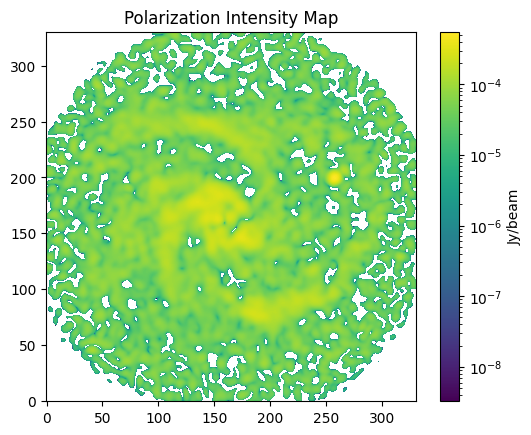

In [ ]:
plt.figure()
plt.imshow(polc_data.squeeze(),origin='lower',norm = LogNorm())
plt.title('Polarization Intensity Map')
plt.colorbar(label = 'Jy/beam')
plt.show()

#SFR VS I

In [ ]:
sfr = fits.open(SFR)

In [ ]:
sfr_data = sfr[0].data

In [ ]:
sfr_data.shape

(331, 331)

In [ ]:
I = fits.open(I_radio)

In [ ]:
I_data = I[0].data

In [ ]:
I_data.shape

(1, 1, 331, 331)

In [ ]:
I_data_squeeze = I_data.squeeze()

In [ ]:
I_data_squeeze.shape

(331, 331)

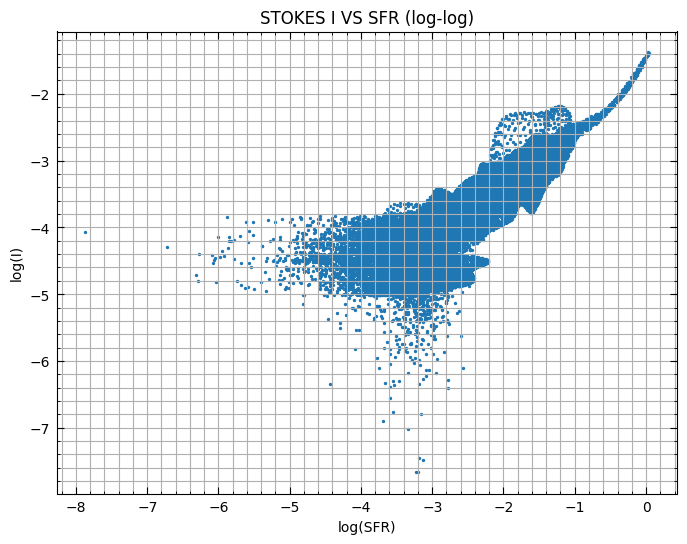

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming sfr_data and I_data_squeeze are defined earlier in your code

log_sfr_data = np.log10(sfr_data.ravel())
log_sfr_data_p = log_sfr_data[np.where(log_sfr_data > -3)]
log_I_data = np.log10(I_data_squeeze.ravel())
log_I_data_p = log_I_data[np.where(log_I_data > -4)]

plt.figure(figsize=(8, 6))
plt.scatter(log_sfr_data, log_I_data, s=2)  # Removed 'origin' parameter
plt.xlabel('log(SFR)')
plt.ylabel('log(I)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('STOKES I VS SFR (log-log)')
plt.grid(True, which='both')
plt.show()


#Plot For Independent Pixel(I vs SFR)




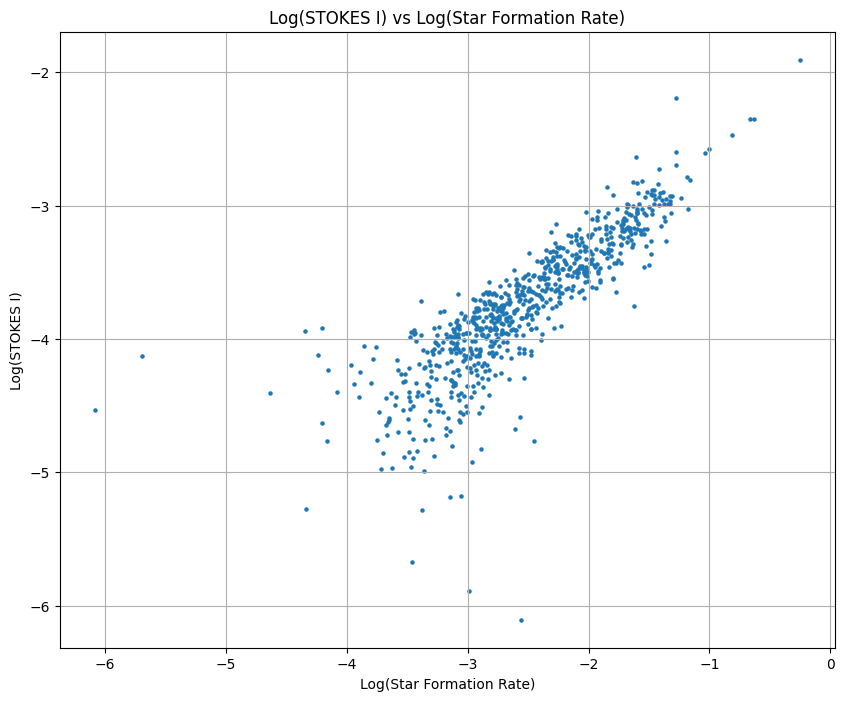

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

I = fits.open(I_radio)
sfr = fits.open(SFR)

sfr_data = sfr[0].data
I_data = I[0].data

I_data_squeeze = np.squeeze(I_data)

header = sfr[0].header
array = []
array1 = []
bmaj = 15
pix_size = 2
pix_step = (1.7 * bmaj) / (pix_size)
for x in range(0, header['naxis1'], int(pix_step)):
    for y in range(0, header['naxis2'], int(pix_step)):
        if (sfr_data[y, x] > 0 and I_data_squeeze[y, x] > 0):
            array.append(float(sfr_data[y, x]))
            array1.append(float(I_data_squeeze[y, x]))

# Convert to log scale
log_sfr = np.log10(array)
log_I = np.log10(array1)

plt.figure(figsize=(10, 8))
plt.scatter(log_sfr, log_I, s=5)
plt.xlabel('Log(Star Formation Rate)')
plt.ylabel('Log(STOKES I)')
plt.title('Log(STOKES I) vs Log(Star Formation Rate)')
plt.grid(True)
plt.show()

#NH VS I

In [ ]:
NH_data = NH[0].data

In [ ]:
NH_data.shape

(331, 331)

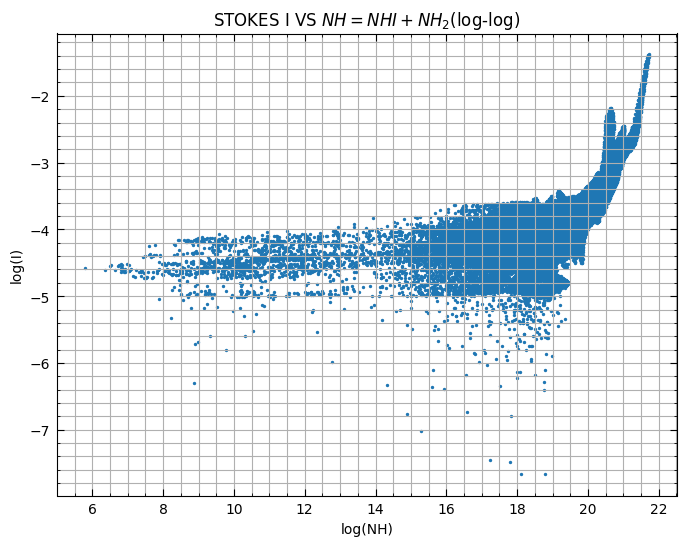

In [ ]:
# prompt: plot NH vs I like previous plot

import matplotlib.pyplot as plt
import numpy as np
log_NH_data = np.log10(NH_data.ravel())
log_NH_data_p = log_NH_data[np.where(log_NH_data>1e20)]
log_I_data = np.log10(I_data_squeeze.ravel())
log_I_data_p = log_I_data[np.where(log_I_data>66e-6)]
plt.figure(figsize=(8, 6))
plt.scatter(log_NH_data, log_I_data, s=2)
plt.xlabel('log(NH)')
plt.ylabel('log(I)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('STOKES I VS $NH = NHI + NH_2$(log-log)')
plt.grid(True, which='both')
plt.show()


#Independet Pixel I vs NH

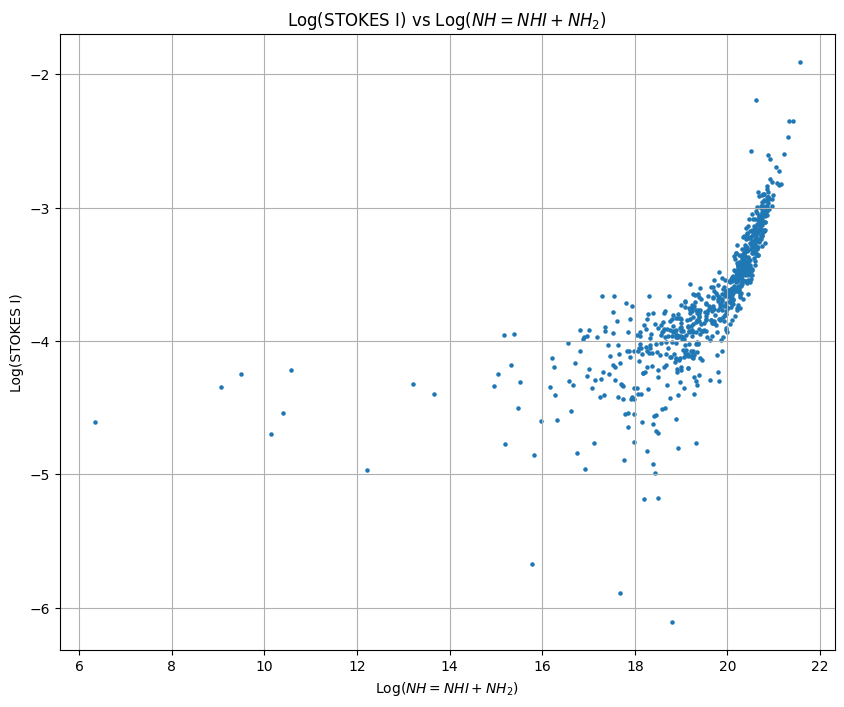

In [ ]:

I = fits.open(I_radio)
NH = fits.open(NH)

sfr = fits.open(SFR)

sfr_data = sfr[0].data
NH_data = NH[0].data
I_data = I[0].data

I_data_squeeze = np.squeeze(I_data)

header = sfr[0].header
array = []
array1 = []
bmaj = 15
pix_size = 2
pix_step = (1.7 * bmaj) / (pix_size)
for x in range(0, header['naxis1'], int(pix_step)):
    for y in range(0, header['naxis2'], int(pix_step)):
        if (NH_data[y, x] > 0 and I_data_squeeze[y, x] > 0):
            array.append(float(NH_data[y, x]))
            array1.append(float(I_data_squeeze[y, x]))

# Convert to log scale
log_NH = np.log10(array)
log_I = np.log10(array1)

plt.figure(figsize=(10, 8))
plt.scatter(log_NH, log_I, s=5)
plt.xlabel('Log($NH = NHI + NH_2$)')
plt.ylabel('Log(STOKES I)')
plt.title('Log(STOKES I) vs Log($NH = NHI + NH_2$)')
plt.grid(True)
plt.show()


#Polarization fraction VS sfr

In [ ]:
I_data = fits.open(I_radio)[0].data
Q_data = fits.open(Q_radio)[0].data
U_data = fits.open(U_radio)[0].data

PF = np.sqrt(Q_data**2 + U_data**2) / I_data

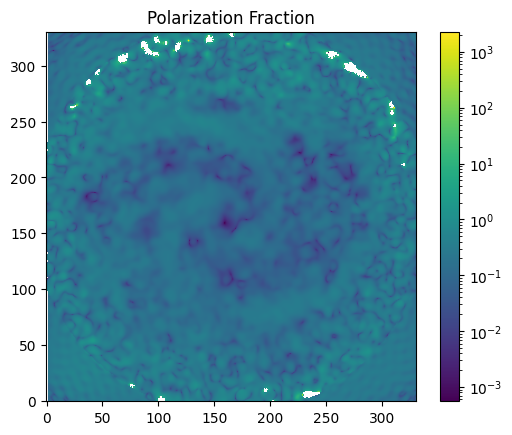

In [ ]:
plt.imshow(PF.squeeze(),origin='lower',norm=LogNorm())
plt.title('Polarization Fraction')
plt.colorbar()
plt.show()

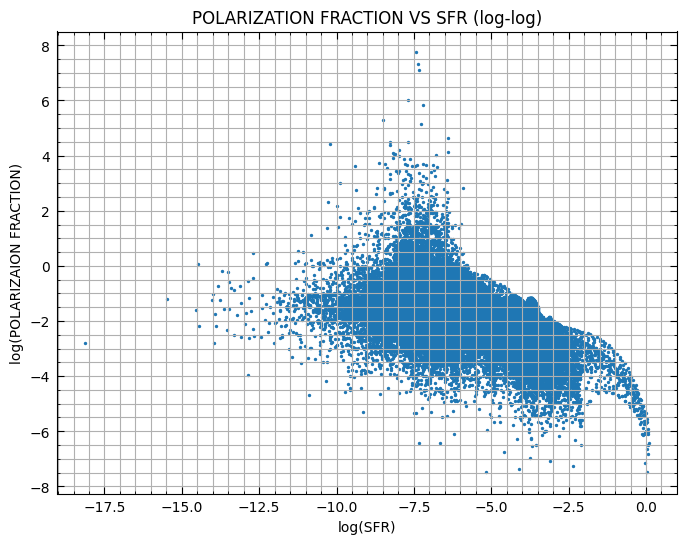

In [ ]:
log_sfr_data = np.log(sfr_data.ravel())
log_PF = np.log(PF.ravel())

plt.figure(figsize=(8, 6))
plt.scatter(log_sfr_data,log_PF, s=2)
plt.xlabel('log(SFR)')
plt.ylabel('log(POLARIZAION FRACTION)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('POLARIZATION FRACTION VS SFR (log-log)')
plt.grid(True, which='both')

plt.show()

In [ ]:
PF.shape

(1, 1, 331, 331)

#Independent pixel

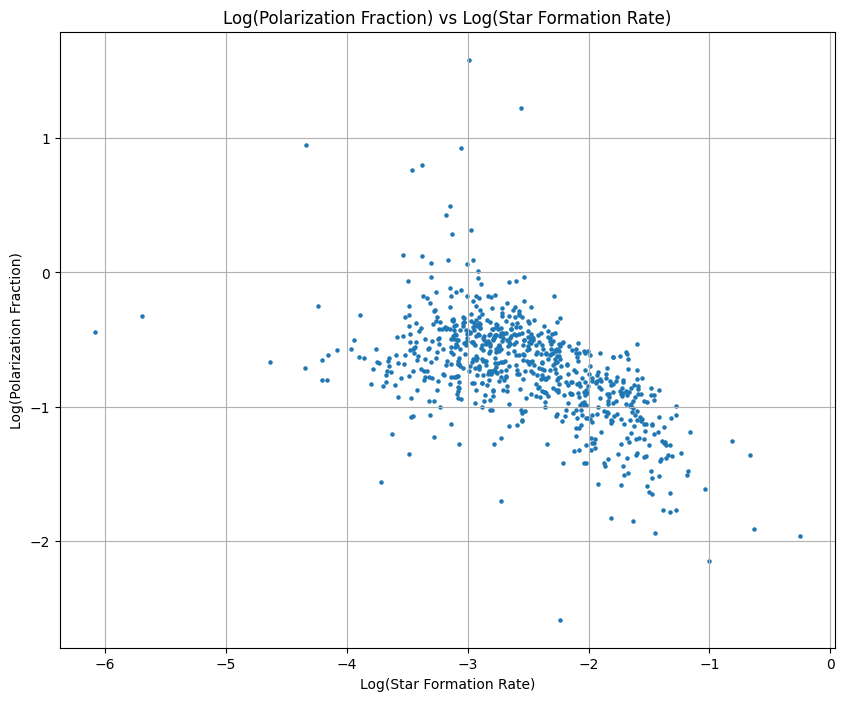

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

I_data = fits.open(I_radio)[0].data
Q_data = fits.open(Q_radio)[0].data
U_data = fits.open(U_radio)[0].data

PF = np.sqrt(Q_data**2 + U_data**2) / I_data
PF_squeeze = np.squeeze(PF)
sfr = fits.open(SFR)
header = sfr[0].header
array = []
array1 = []
bmaj = 15
pix_size = 2
pix_step = (1.7 * bmaj) / (pix_size)

for x in range(0, header['naxis1'], int(pix_step)):
    for y in range(0, header['naxis2'], int(pix_step)):
       if (sfr_data[y, x] > 0) and (PF_squeeze[y, x]> 0):
            array.append(float(sfr_data[y, x]))
            array1.append(float(PF_squeeze[y, x]))

# Convert to log scale
log_sfr = np.log10(array)
log_PF = np.log10(array1)

plt.figure(figsize=(10, 8))
plt.scatter(log_sfr, log_PF, s=5)
plt.xlabel('Log(Star Formation Rate)')
plt.ylabel('Log(Polarization Fraction)')
plt.title('Log(Polarization Fraction) vs Log(Star Formation Rate)')
plt.grid(True)
plt.show()



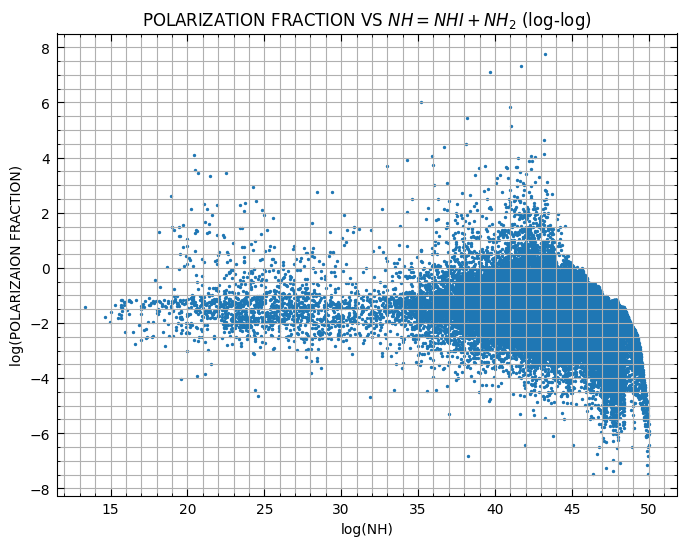

In [ ]:
log_NH_data = np.log(NH_data.ravel())
log_PF = np.log(PF.ravel())

plt.figure(figsize=(8, 6))
plt.scatter(log_NH_data,log_PF, s=2)
plt.xlabel('log(NH)')
plt.ylabel('log(POLARIZAION FRACTION)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('POLARIZATION FRACTION VS $NH = NHI + NH_2$ (log-log)')
plt.grid(True, which='both')

plt.show()

#SFR VS NHI

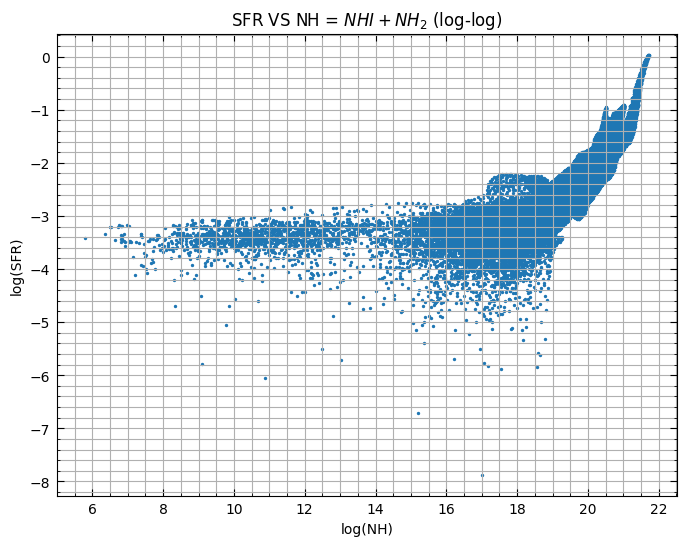

In [ ]:
# prompt: plot NH and SFR like previous we did in log scale

import matplotlib.pyplot as plt
import numpy as np
# #SFR VS NHI

log_sfr_data = np.log10(sfr_data.ravel())
log_sfr_data_p = log_sfr_data[np.where(log_sfr_data>11e-4)]
log_NH_data = np.log10(NH_data.ravel())
log_NH_data_p = log_NH_data[np.where(log_NH_data>1e20)]

plt.figure(figsize=(8, 6))
plt.scatter(log_NH_data, log_sfr_data, s=2)
plt.xlabel('log(NH)')
plt.ylabel('log(SFR)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('SFR VS NH = $NHI + NH_2$ (log-log)')
plt.grid(True, which='both')
plt.show()


In [ ]:

# Independent pixels for sfr vs nh

sfr = fits.open(SFR)
NH = fits.open(NH)

sfr_data = sfr[0].data
NH_data = NH[0].data

header = sfr[0].header
array = []
array1 = []
bmaj = 15
pix_size = 2
pix_step = (1.7 * bmaj) / (pix_size)
for x in range(0, header['naxis1'], int(pix_step)):
    for y in range(0, header['naxis2'], int(pix_step)):
        if (sfr_data[y, x] > 0 and NH_data[y, x] > 0):
            array.append(float(sfr_data[y, x]))
            array1.append(float(NH_data[y, x]))

# Convert to log scale
log_sfr = np.log10(array)
log_NH = np.log10(array1)

plt.figure(figsize=(10, 8))
plt.scatter(log_sfr, log_NH, s=5)
plt.xlabel('Log(Star Formation Rate)')
plt.ylabel('Log($NH = NHI + NH_2$)')
plt.title('Log($NH = NHI + NH_2$) vs Log(Star Formation Rate)')
plt.grid(True)
plt.show()


TypeError: stat: path should be string, bytes, os.PathLike or integer, not method

#POLC MAP

In [ ]:
polc = fits.open(polc)

polc_data = polc[0].data

In [ ]:
# prompt: I want to add in color bar the unit Jy/beam

import matplotlib.pyplot as plt
plt.imshow(polc_data.squeeze(),origin='lower',norm=LogNorm())
plt.title('Polarization Intensity')
plt.colorbar(label='Jy/beam')
plt.show()


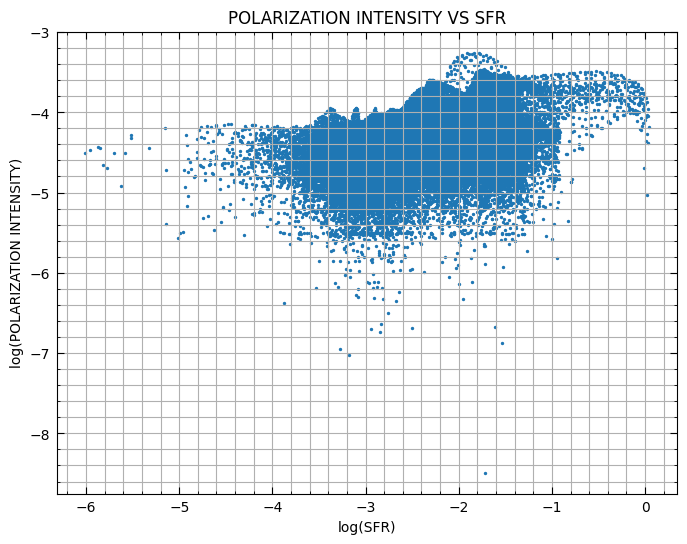

In [ ]:
# prompt: Now plot this vs sfr like sfr vs I in log scale

import matplotlib.pyplot as plt
import numpy as np
log_sfr_data = np.log10(sfr_data.ravel())
log_sfr_data_p = log_sfr_data[np.where(log_sfr_data>11e-4)]
log_polc_data = np.log10(polc_data.ravel())
log_polc_data_p = log_polc_data[np.where(log_polc_data>66.66e-6)]
plt.figure(figsize=(8, 6))
plt.scatter(log_sfr_data, log_polc_data, s=2)
plt.xlabel('log(SFR)')
plt.ylabel('log(POLARIZATION INTENSITY)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('POLARIZATION INTENSITY VS SFR')
plt.grid(True, which='both')
plt.show()


#Independent Pixel

In [ ]:
# prompt: plot for independent pixel like previous

import matplotlib.pyplot as plt
import numpy as np
# #Independent Pixel
sfr = fits.open(SFR)
polc = fits.open(polc)

sfr_data = sfr[0].data
polc_data = polc[0].data

header = sfr[0].header
array = []
array1 = []
bmaj = 15
pix_size = 2
pix_step = (1.7 * bmaj) / (pix_size)
for x in range(0, header['naxis1'], int(pix_step)):
    for y in range(0, header['naxis2'], int(pix_step)):
        if (sfr_data[y, x] > 0)  and (polc_data[y, x] > 0):
            array.append(float(sfr_data[y, x]))
            array1.append(float(polc_data[y, x]))

# Convert to log scale
log_sfr = np.log10(array)
log_polc = np.log10(array1)

plt.figure(figsize=(10, 8))
plt.scatter(log_sfr, log_polc, s=5)
plt.xlabel('Log(Star Formation Rate)')
plt.ylabel('Log(Polarization Intensity)')
plt.title('Log(Polarization Intensity) vs Log(Star Formation Rate)')
plt.grid(True)
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

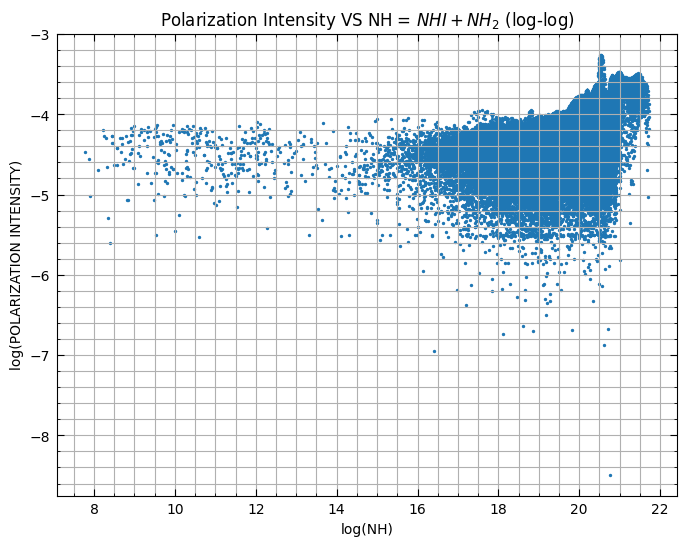

In [ ]:
# prompt: plot NH vs POLC

import matplotlib.pyplot as plt
import numpy as np
log_NH_data = np.log10(NH_data.ravel())
log_NH_data_p = log_NH_data[np.where(log_NH_data>1e21)]
log_polc_data = np.log10(polc_data.ravel())
log_polc_data_p = log_polc_data[np.where(log_polc_data>66.66e-6)]
plt.figure(figsize=(8, 6))
plt.scatter(log_NH_data, log_polc_data, s=2)
plt.xlabel('log(NH)')
plt.ylabel('log(POLARIZATION INTENSITY)')
plt.tick_params(axis='both', which='major', length=5, pad=5, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')
plt.minorticks_on()
plt.title('Polarization Intensity VS NH = $NHI + NH_2$ (log-log)')
plt.grid(True, which='both')
plt.show()
